# Importamos librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargando datos

In [20]:
df_torneo = pd.read_csv(r'./kcnov22.csv')
# Mostramos las primeras 5 filas
df_torneo.head()

,deck,skill,ndmax,zerotg,zephra,bryan,xenoblur
0,Wounded Heros,Héroe Herido,2022-11-08,False,True,False,False
1,Fish Shark,El alzamiento de Shark,2022-11-08,False,True,False,False
2,Railway,Tren Imparable,2022-11-08,True,False,False,False
3,Code Talker,Codificador Hablador Vivo,2022-11-08,True,False,False,False
4,Salamangreat,Vinculaciones,2022-11-08,True,False,False,False


#### Información del dataframe

In [21]:
df_torneo.info()
# Dimensiones del DataFrame
df_torneo.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   deck      411 non-null    object
 1   skill     411 non-null    object
 2   ndmax     411 non-null    object
 3   zerotg    411 non-null    bool  
 4   zephra    411 non-null    bool  
 5   bryan     411 non-null    bool  
 6   xenoblur  411 non-null    bool  
dtypes: bool(4), object(3)
memory usage: 11.4+ KB


(411, 7)

# Preguntas
1. [ ] Servidores en los que se compartieron más **Decks** 
2. [ ] **Skills** que más se repiten en arquetipos
3. [ ] ¿**Decks** que llegaran a su rangon maximo(**_ndmax_**)?

### Repuesta 1

In [23]:
# Cambiar el tipo de valor
servers = df_torneo.iloc[:, 3:].astype('int').sum()

# Creando DataFrame
comunidad_servers = pd.DataFrame(
            {
            'Servers': servers.to_dict().keys(),
            'Total': servers.to_dict().values(),
            }  
        )

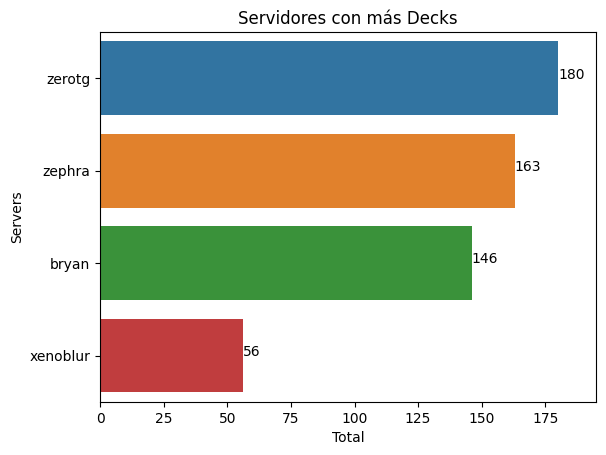

In [29]:
fig, ax = plt.subplots()
plt.xlim(0,195)
# titulo del grafico
plt.title("Servidores con más Decks")

# Creando grafica
sns.barplot(data=comunidad_servers, y='Servers', x='Total')
for pY, pX in enumerate(comunidad_servers.Total):
    ax.annotate(pX, xy=(pX, pY))
plt.show()

### Respuesta 2

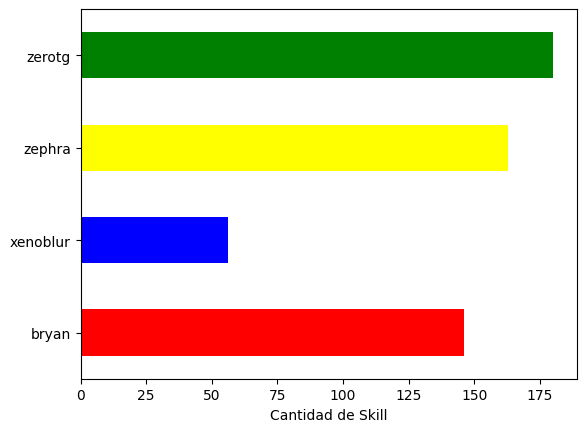

In [7]:
df_torneo.head(2)

# skill con más frecuencia
#df_torneo['skill'].value_counts().plot.bar();


# Crear y DataFrame y cambiar tipo de datos
df_ss = df_torneo[['skill', 'zerotg', 'zephra', 'bryan', 'xenoblur']].copy()
df_ss.iloc[:, 1:] = df_ss.iloc[:, 1:].astype('int')


df_ss.pivot_table(

                 index='skill',
                 values=['zerotg', 'zephra', 'bryan', 'xenoblur'], 
                 aggfunc='sum'
                 
                 ).sum().plot.barh(color=['Red', 'Blue', 'Yellow', "Green"]);

plt.xlabel("Cantidad de Skill");

In [8]:
!pip install pivottablje

ERROR: Could not find a version that satisfies the requirement pivottablje (from versions: none)
ERROR: No matching distribution found for pivottablje
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
# Tabla dinamica de interfaz 
from pivottablje import pivot_table
pivot_table(df_ss)

ModuleNotFoundError: No module named 'pivottablje'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=866c1824-7b4c-45aa-8757-00af69acd7e8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>